In [5]:
import gymnasium as gym
import time
from IPython.display import clear_output

env = gym.make("Taxi-v3", render_mode="ansi").env
env.reset()

(242, {'prob': 1.0, 'action_mask': array([1, 1, 1, 1, 0, 0], dtype=int8)})

In [13]:

env.s = 122
s=env.render()
print(s) #Yes.. really... this is needed, VS-Code addon for Jupyter NTB just doesn't format its output by itself

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+




In [20]:
print(env.step(3))

#The function (env.P) below can be used to see the relevant states and rewards for each action taken in that particular state.
env.env.P[300]


(102, -1, False, False, {'prob': 1.0, 'action_mask': array([1, 1, 1, 0, 0, 0], dtype=int8)})


{0: [(1.0, 400, -1, False)],
 1: [(1.0, 200, -1, False)],
 2: [(1.0, 300, -1, False)],
 3: [(1.0, 300, -1, False)],
 4: [(1.0, 300, -10, False)],
 5: [(1.0, 300, -10, False)]}

: 

In [64]:
import numpy as np
import random

def Q_learning_train(env,alpha,gamma,epsilon,episodes): 
    all_epochs = []
    all_penalties = []
    q_table = np.zeros([env.observation_space.n, env.action_space.n])


    #print(env.env)
    #return
    for i in range(1, episodes+1):
        state = env.reset()[0]
        #print(state)

        epochs, penalties, reward = 0,0,0

        done = False

        while not done:
            if random.uniform(0,1) < epsilon:
                action = env.action_space.sample()
            else:
                #print(state)
                action = np.argmax(q_table[state])

            #print(env.step(action))
            (next_state, reward, done, info1, info2) = env.step(action)

            old_value = q_table[state,action]
            next_max = np.max(q_table[next_state])

            new_value = (1-alpha) * old_value+alpha*(reward+gamma*next_max)

            q_table[state, action] = new_value

            if reward == -10:
                penalties +=1

            state = next_state
            epochs += 1

        if i % 1000 ==0:
            clear_output(wait=True)
            print(f"Episode: {i}")

    #env.env.nS - number of states
    #env.env.nA - number of Actions
    #policy = np.ones([env.env.nS, env.env.nA]) / env.env.nA
    policy = np.ones([env.observation_space.n,env.action_space.n]) / env.action_space.n
    for state in range(env.observation_space.n):  #for each states
        best_act = np.argmax(q_table[state]) #find best action
        policy[state] = np.eye(env.action_space.n)[best_act]  #update 
        
    print("Training finished.\n")
    return policy, q_table


In [65]:
env = gym.make("Taxi-v3", render_mode="ansi").env
env.reset() 


Q_learn_pol = Q_learning_train(env,0.2,0.95,0.1,100000)

Episode: 100000
Training finished.



In [67]:
print(Q_learn_pol[0])

[[1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]
 ...
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]]


In [68]:
# print(env.action_space,env.observation_space)
# print(env.action_space.n,env.observation_space.n)


In [75]:
def count(policy):
    curr_state = env.reset()[0]
    counter = 0
    reward = None
    while reward != 20:
        state, reward, done, info1, info2 = env.step(np.argmax(policy[curr_state]))  
        curr_state = state
        counter += 1
    return counter



An agent using a policy which has been improved using Q-learning takes about an average of 13 steps to successfully complete its mission.


/tmp/ipykernel_505/490548827.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Q_counts)


<Axes: ylabel='Density'>

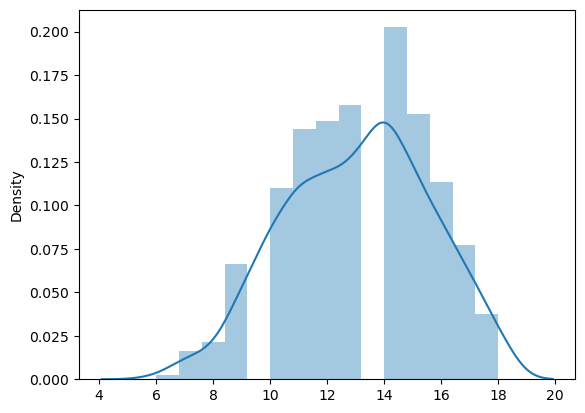

In [76]:
import seaborn as sns

Q_Learning_counts = count(Q_learn_pol[0])
Q_counts = [count(Q_learn_pol[0]) for i in range(1000)]
print("An agent using a policy which has been improved using Q-learning takes about an average of " + str(int(np.mean(Q_counts)))
      + " steps to successfully complete its mission.")
sns.distplot(Q_counts)